In [1]:
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
from decimal import Decimal
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
import pandas as pd
from sklearn.preprocessing import normalize
import glob

In [13]:
folder = "/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/"
data = []
for i in range(5):
    filenames = sorted(glob.glob(folder + 'Biggest_component_1E*_'+str(i)+'_1.txt'))
    print(filenames)
    data.append([np.loadtxt(fname=f, delimiter=',') for f in filenames])

['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_0_1.txt']
['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_1_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_1_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_1_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_1_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_1_1.txt']
['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component

In [3]:
N = np.array([1e3, 1e4, 1e5, 1e6, 1e7])

In [4]:
c = ['#4DA6FF', '#FFAB2E', '#FF38C3', '#3BFF55', '#7b556c']

In [5]:
rc(r'text', usetex=True)

In [6]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }
titles = [r'$k_{min}$ = 1, $\lambda$ = 1.751, $\gamma$ = 2.5', 
          r'$k_{min}$ = 1, $\lambda$ = 0.551, $\gamma$ = 3.0',
          r'$k_{min}$ = 1, $\lambda$ = 0.334, $\gamma$ = 3.5',
          r'$k_{min}$ = 1, $\lambda$ = 0.26, $\gamma$ = 4.0',
          r'$k_{min}$ = 1, $\lambda$ = 0.223, $\gamma$ = 4.5']

In [7]:
def plot_Tm_p(i):
    fig, axs = plt.subplots(figsize=(15, 7))
    j = 0
    for d in data[i]:
        axs.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.45)
        axs.legend(loc='lower left', shadow=True, fontsize='x-large')
        plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
        plt.xlabel('$1 - p$', font)
        plt.xlim(0.1,1)
        plt.xscale('log')
        j += 1
        plt.title(titles[i], fontdict=font)

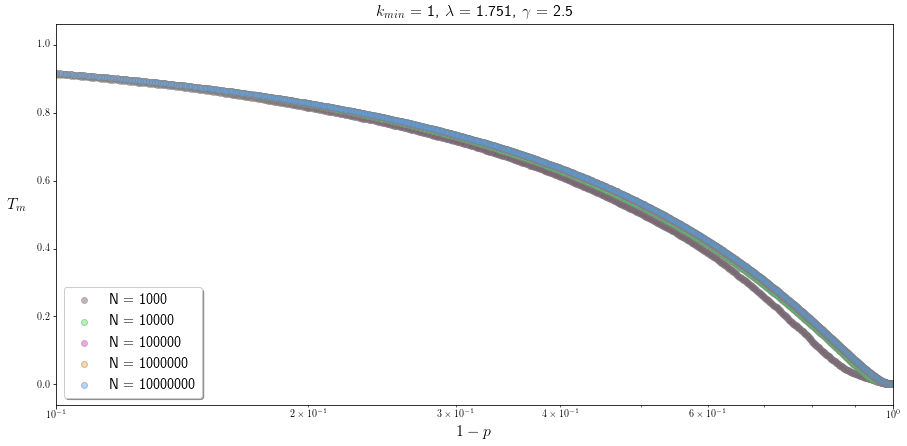

In [8]:
plot_Tm_p(0)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_0_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

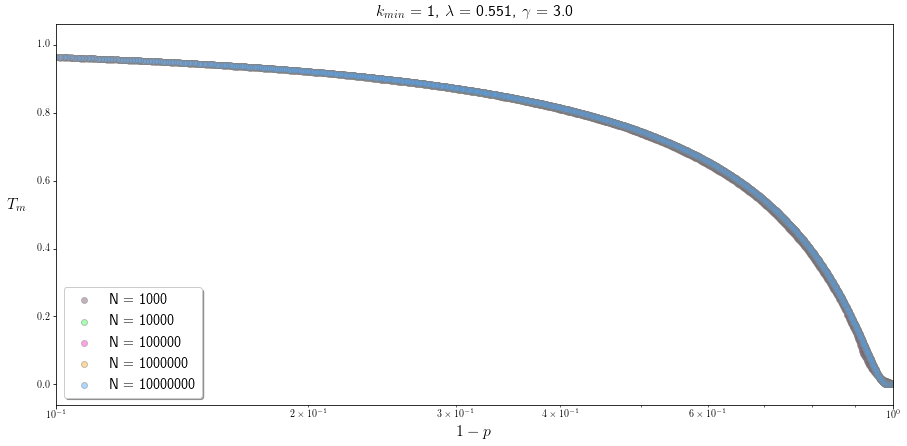

In [9]:
plot_Tm_p(1)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_1_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

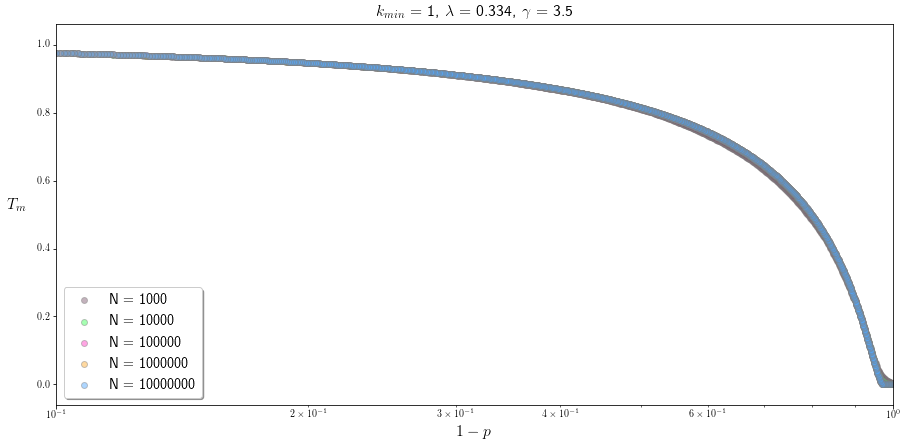

In [10]:
plot_Tm_p(2)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_2_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

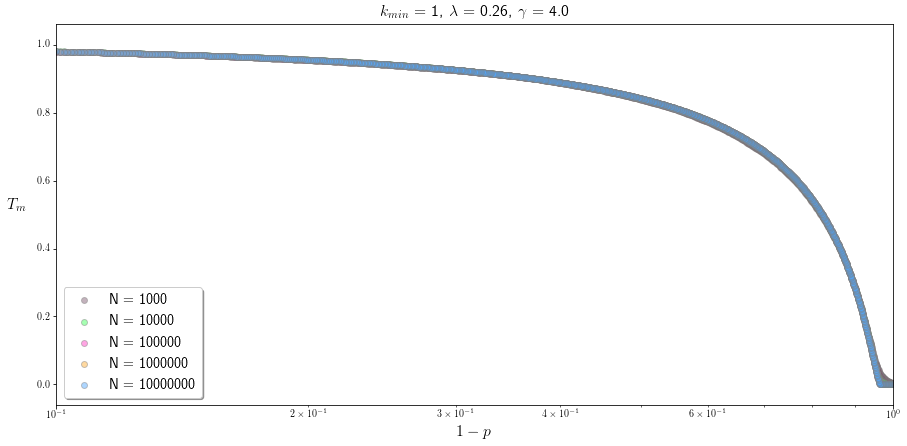

In [11]:
plot_Tm_p(3)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_3_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

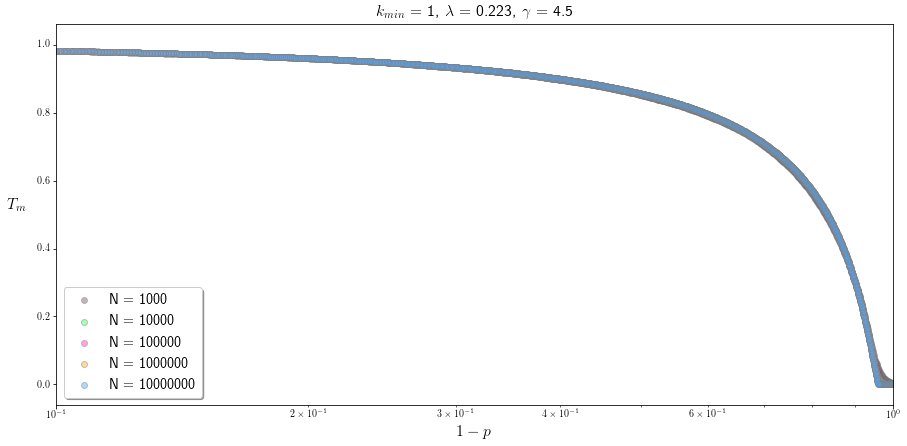

In [14]:
plot_Tm_p(4)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_4_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [101]:
def plot_graph(data):
    fig, axs = plt.subplots(figsize=(15, 7))
    i = 0
    for datum in data:
        axs.plot(1 - datum[4].T[0][:-1], datum[4].T[1][:-1], color=c[i], label=titles[i], lw=1, alpha=0.8)
        for d in datum:
            axs.plot(1 - d.T[0][:-1], d.T[1][:-1], color=c[i], lw=1, alpha=0.8)
        i += 1
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.1,1)
    plt.xscale('log')
#     plt.yscale('log')
    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.title( 'Overlaped curves', fontdict=font)

In [237]:
def plot_Tm_p_all():
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    for i in range(5):
        j = 0
        for d in data[i]:
            ax = fig.add_subplot(5, 1, i + 1)
            ax.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.45)
            ax.legend(loc='lower left', shadow=True, fontsize='x-large')

            ax.set_xticks([])
            plt.xlim(0.07,1)
            plt.subplots_adjust(hspace = .001)
            plt.xscale('log')
            j += 1
            plt.text(0.25, 0.0, titles[i], fontdict=font)
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)

/home/marcio/Projects/Random-Graph/RandomGraph_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


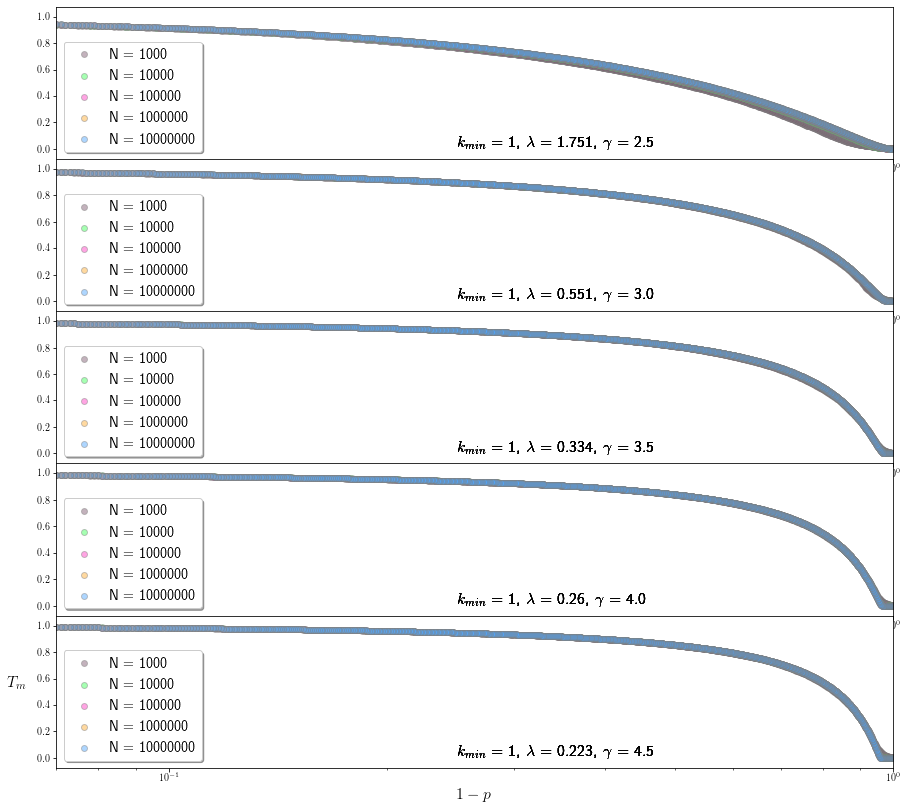

In [238]:
plot_Tm_p_all()
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_all.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

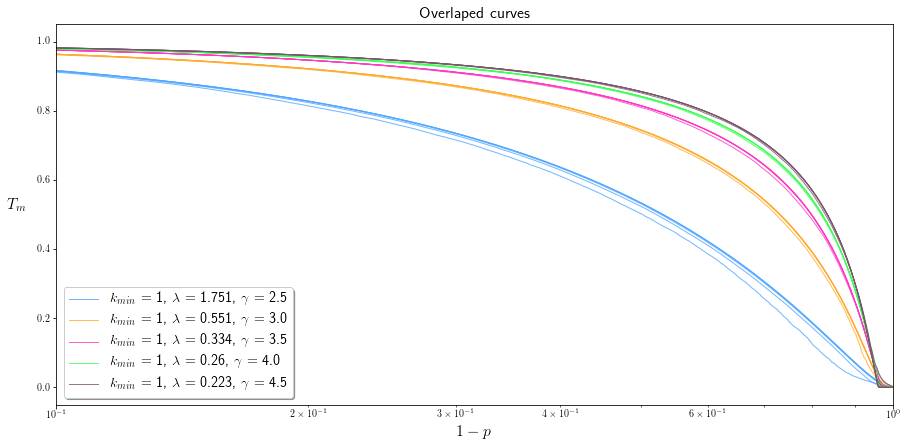

In [133]:
plot_graph(data)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_all_overlap.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [239]:
def dfdx3p(i, h, n, y):
    return (1 / (2 * h * n)) * (y[i + n] - y[i - n])

def dfdx5p(i, h , n, y):
    h = n * h
    return (1 / (12 * h)) * (y[i - (2 * n)] - 8 * y[i - (n)] + 8 * y[i + (n)] - y[i + (2 * n)])

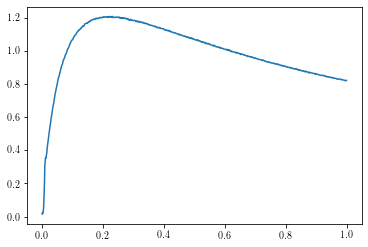

In [281]:
plt.plot(data[0][4].T[0][2:-1], dfdx3p(np.array(range(1, len(data[0][4].T[0][:-1]) - 1)), data[0][4].T[0][1], 1, data[0][4].T[1][:-1]))

In [109]:
def plot_Tm_p_all():
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))
    for i in range(4):
        j = 0
        for d in data[i]:
            axs[int(i/2)][i%2].plot(d[:-1].T[0][:-1], 
                                    dfdx3p(np.array(range(len(d[:-1].T[0] - 1))), d[:-1].T[0][1], 1, d[:-1].T[1][:-1])
                                    , color=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.8)
            axs[int(i/2)][i%2].legend(loc='lower left', shadow=True, fontsize='x-large')
            axs[int(i/2)][0].set_ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
            axs[1][i%2].set_xlabel('$1 - p$', font)
            plt.xlim(0.1,1)
            plt.xscale('log')
            j += 1
            axs[int(i/2)][i%2].set_title(titles[i], fontdict=font)

In [ ]:
1 / ( 2 * data[0][4].T[0][:-1][1])

In [ ]:
data[0][4].T[0][:-1][100]

In [ ]:
data[0][4].T[0][:-1][99]

In [ ]:
dfdx5p(995, data[4][4].T[0][:-1][1], 1, data[4][4].T[1][:-1])

In [ ]:
dfdx3p(995, data[4][4].T[0][:-1][1], 1, data[4][4].T[1][:-1])

In [ ]:
pc4 = []
for d in data3:
    pc4.append(d.T[0][-1])

In [ ]:
fig, axs = plt.subplots(figsize=(15, 7))
axs.scatter(N, pc4, color="gray", facecolors=c[0], alpha=0.45, s=100)
axs.plot(N, pc4, color='black', lw=1)
axs.legend(loc='lower left', shadow=True, fontsize='x-large')
plt.ylabel('$P_c$', rotation=0, labelpad=20, fontdict=font)
plt.xlabel('$N$', font)
plt.yscale('log')
plt.xscale('log')
    # plt.title('$\lambda$ = $f(\mathbb{E}[X$ ~ Zipf$(\gamma = 2.5)])$', fontdict=font)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/pcXN.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')